# Libraries

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Loading dataset

In [2]:
# Define column names
# 7. Attribute Information:
#    1. sepal length in cm
#    2. sepal width in cm
#    3. petal length in cm
#    4. petal width in cm
#    5. class: 
#       -- Iris Setosa
#       -- Iris Versicolour
#       -- Iris Virginica
file_path = "iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Read the space-separated file into a Pandas DataFrame with column names
iris_data = pd.read_csv(file_path, delimiter=',', header=None, names=column_names)

# Dataset summary

##### It was mentioned that the data has no missing values, but as a part of practicing we will check this

In [3]:
# Checking the missing data
iris_data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [4]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris_data.shape

(150, 5)

In [6]:
iris_data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
# Checking the data imbalance
class_counts = iris_data['class'].value_counts()

print("Class Counts:")
print(class_counts)


Class Counts:
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


# Exploring data with visualization

Text(0, 0.5, 'count')

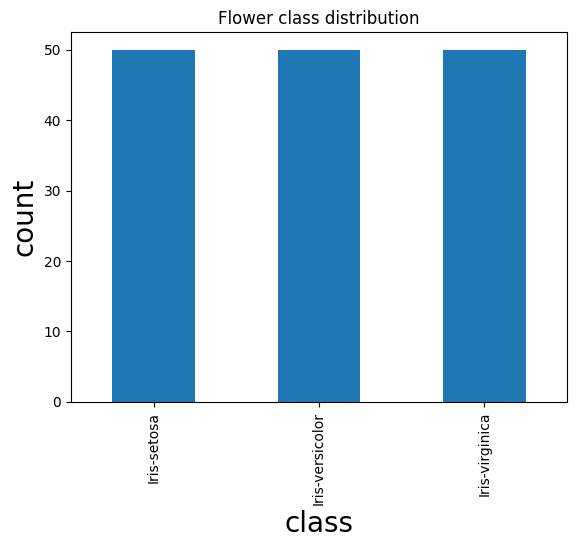

In [8]:
# iris flower dataset class distribution
nameplot = iris_data['class'].value_counts().plot.bar(title='Flower class distribution')
nameplot.set_xlabel('class',size=20)
nameplot.set_ylabel('count',size=20)

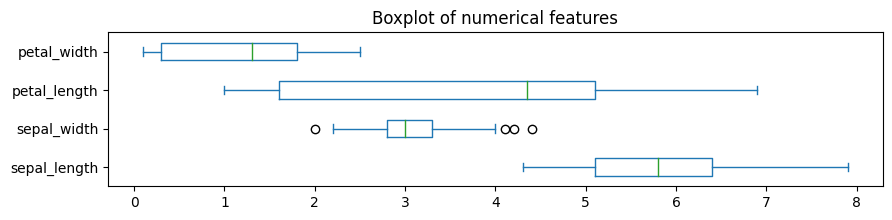

In [9]:
# visulaizing the distribution of the attributes

iris_data.plot(kind='box', vert=False, figsize=(10, 2), title = 'Boxplot of numerical features')
plt.show()


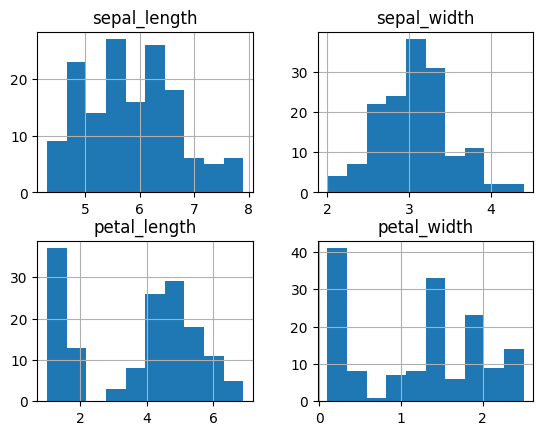

In [10]:
iris_data.hist()
plt.show()

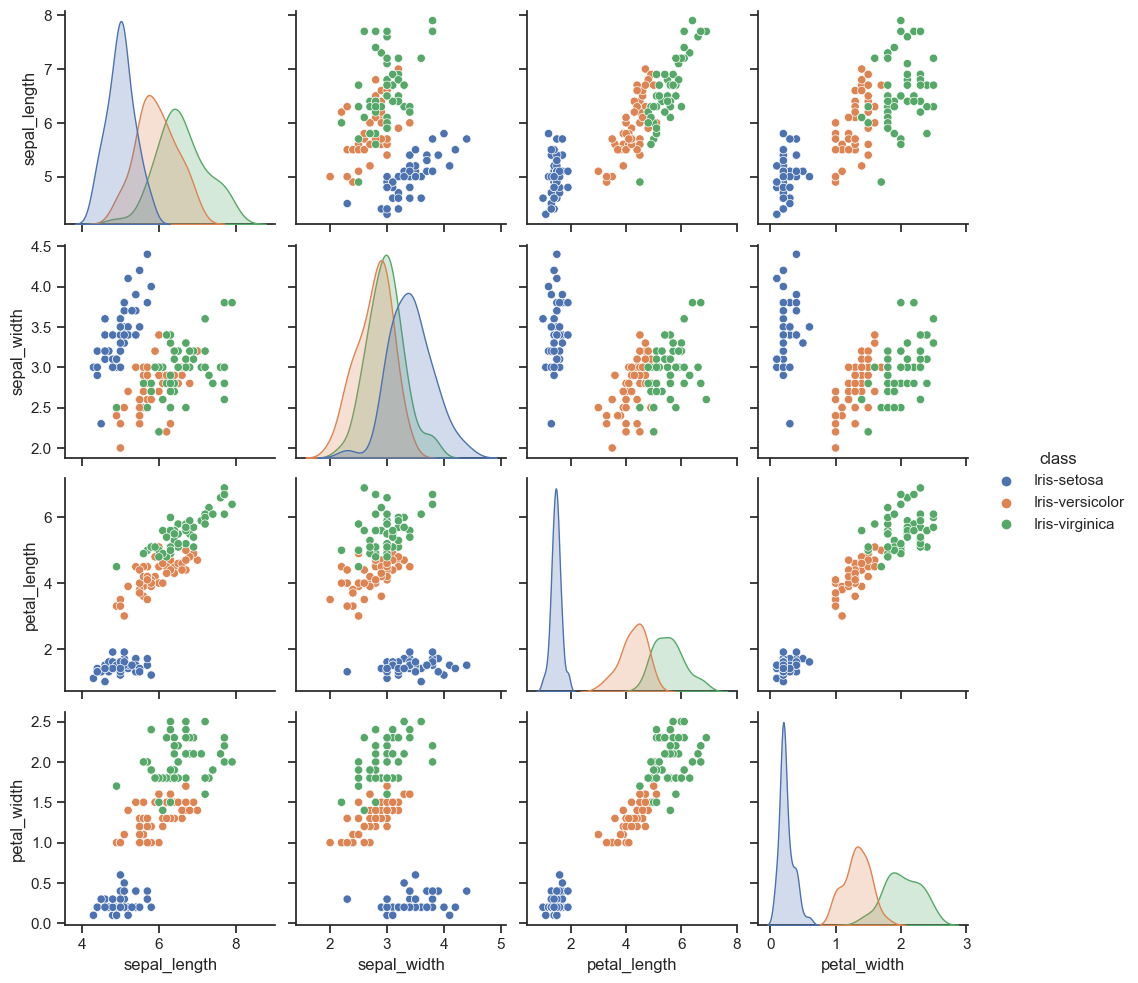

In [11]:
sns.set(style="ticks")
sns.pairplot(iris_data, hue="class")

we can see PetalWidth and PetalLength has the strongest pair-wise relationship for classification

# Data Modeling:

In [12]:
# Selecting the 'class' cloumn as the target 'y'
y = iris_data['class']

# Using the rest of the columns (excluding 'class_setosa') as input features 'X'
X = iris_data.drop('class', axis=1)  # Drop the selected target column

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [13]:
# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


## Choosing the model

## Dummy classifier

In [14]:
# Create and train a DummyClassifier
dummy = DummyClassifier(strategy='uniform') 
dummy.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy.predict(X_test)

# Evaluate the DummyClassifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.33
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.22      0.29      0.25         7
Iris-versicolor       0.38      0.25      0.30        12
 Iris-virginica       0.38      0.45      0.42        11

       accuracy                           0.33        30
      macro avg       0.33      0.33      0.32        30
   weighted avg       0.34      0.33      0.33        30



## Different models

In [18]:
# models
models = []

# linear models
models.append(('LR', LogisticRegression(solver='liblinear', multi_class="auto")))
models.append(('LDA', LinearDiscriminantAnalysis()))

# nonlinear models
models.append(('CART', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVC', SVC(gamma="auto")))

# evaluate each model in turn
print("Model Accuracy:")
names = []
accuracy = []
for name, model in models:
    # 10 fold cross validation to evaluate model
    kfold = KFold(n_splits=10, random_state=7, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # display the cross validation results of the current model
    names.append(name)
    accuracy.append(cv_results)
    msg = "%s: accuracy=%f std=(%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg) 


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.91666667, 1.        , 1.        , 1.        ])

Text(0.5, 1.0, 'Model Accuracy Comparison')

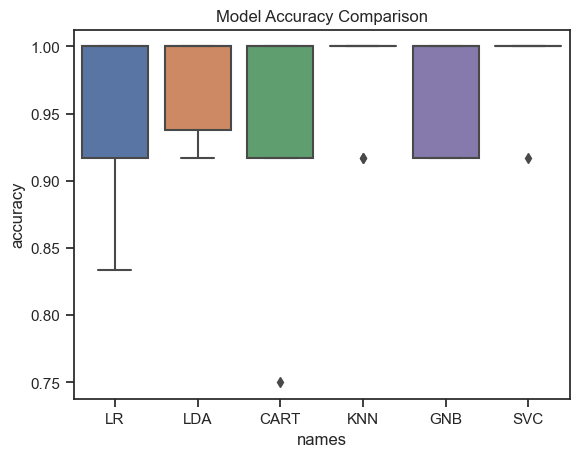

In [16]:
# Visualizing the training with Box Plot

list_of_tuples = list(zip(names, accuracy))
df = pd.DataFrame(list_of_tuples,
                  columns=['names', 'accuracy'])

df = df.explode('accuracy')
df['accuracy'] = df['accuracy'].astype('float')
ax = sns.boxplot(data=df, x='names', y='accuracy')
ax.set_title('Model Accuracy Comparison')

From above box plot, we can see the accuracy of the KNN and SVC models has small deviation.
Test the KNN and SVC models with test data and output their accuracy with confusion matrix together for selecting model

In [17]:
# models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC(gamma="auto")))

In [26]:
# reusable function to test our model
def test_model(model):
    model.fit(X_train, y_train) # train the whole training set
    predictions = model.predict(X_test) # predict on test set
    
    # output model testing results
    print("Accuracy:", accuracy_score(y_test, predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, predictions))
    print("Classification Report:")
    print(classification_report(y_test, predictions))

In [27]:
# predict values with our test set
for name, model in models:
    print("----------------")
    print("Testing", name)
    test_model(model)

----------------
Testing KNN
Accuracy: 0.9
Confusion Matrix:
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30

----------------
Testing SVC
Accuracy: 0.9333333333333333
Confusion Matrix:
[[ 7  0  0]
 [ 0 10  2]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.94      0.94        

The highest testing accuracy is 0.93 from Support Vector Classifier.
The SVC's confustion matrix has the highest diagonal values indicated that SVC predicted the class type better than the KNN.
From above confusion matrix and classification report, the SVC model is the best model for our classification problem